All necessary modules imported

In [1]:
from mlxtend.data import loadlocal_mnist
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import time
import random

Loaded the whole MNIST dataset from local files.
You might want to install mlxtend, or use the gist the proffesor gave. 

I used mlxtend having used it before in my old college. I find it easier to use and more straightforward.

In [2]:
train_images, train_labels = loadlocal_mnist(
        images_path='train-images-idx3-ubyte', 
        labels_path='train-labels-idx1-ubyte')
test_images, test_labels = loadlocal_mnist(
    images_path='t10k-images-idx3-ubyte',
    labels_path='t10k-labels-idx1-ubyte')

Chose two digit groups from data.

I chose 7s and 3s as recommended by the proffessor.

To do this selection, I looped thorugh the training labels. Any time I saw a 7 or a 3, I would fetch the corresponding image and store it in a python array. I would also store the corresponding label.

In [3]:
def select_digit_set(images, labels, digit1=3, digit2=7):
    image_data, image_labels = [], []
    for i in range(len(labels)):
        if labels[i] == digit1 or labels[i] == digit2:
            image_data.append(images[i])
            image_labels.append(labels[i])
    return np.array(image_data), np.array(image_labels)
            
images_tr, labels_tr = select_digit_set(images=train_images, labels=train_labels)

Plot 16 images from the filter above

I apologize for labelling them on the Y axis. I did this because the space between the subgrids was tiny above and below.

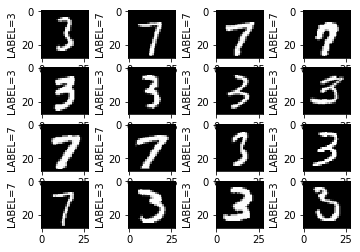

In [14]:
import matplotlib.pyplot as plt
def image_plotter(rows=4, columns=4, images=images_tr, labels=labels_tr):
    plt.figure(0)
    count = 0
    for i in range(rows):
        for j in range(columns):
            plt.subplot2grid((rows,columns), (i,j))
            randin = random.randint(0, len(images))
            image = np.array(images[randin], dtype='float')
            pixels = image.reshape((28, 28))
            plt.imshow(pixels, cmap='gray')
            plt.ylabel("LABEL={}".format(labels[randin]))
            count+=1
            
    plt.show()
image_plotter()

First filter the testing set too.

In [5]:
images_ts, labels_ts = select_digit_set(images=test_images, labels=test_labels)

I also plotted the test selection above to prove that I actually selected the right thing.

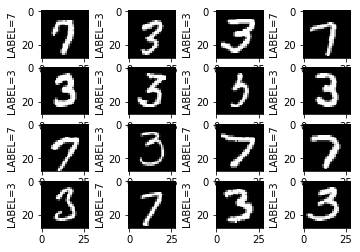

In [6]:
image_plotter(images=images_ts, labels=labels_ts)

The training dataset has a lenght of 12396. The testing has a length of 2038. This will take forever to run. I used 1/n of the datasets for my training and testing. I simply sliced the sets to an nth their length for this to retain the order of labels and image pixel data. This is quick and does the trick. If I set n to 1, it uses the whole dataset. I think you get the idea.

The data is not in order thus the randomization is retained.

In [7]:
n = 1
print("######################### BEFORE SLICING ##############################\n")
print("\t\tThe length of the training set is {}. \n\t\tThe length of the testing set is {} \n"
      .format(len(labels_tr),len(labels_ts)))

sub_images_tr, sub_images_ts = images_tr[:len(images_tr)//n], images_ts[:len(images_ts)//n]
sub_labels_tr, sub_labels_ts = labels_tr[:len(labels_tr)//n], labels_ts[:len(labels_ts)//n]

print("######################### AFTER SLICING ##############################\n")
print("\t\tThe length of the sliced training set is {}. \n\t\tThe length of the sliced testing set is {} \n"
      .format(len(sub_labels_tr),len(sub_labels_ts)))


######################### BEFORE SLICING ##############################

		The length of the training set is 12396. 
		The length of the testing set is 2038 

######################### AFTER SLICING ##############################

		The length of the sliced training set is 12396. 
		The length of the sliced testing set is 2038 



Plot some from the sliced set

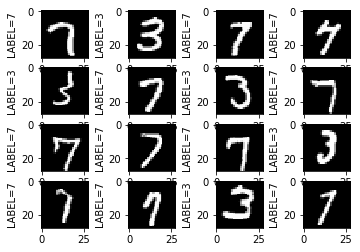

In [8]:
image_plotter(images=sub_images_tr, labels=sub_labels_tr)

we scale the data in the range [-1,1]

There is a data type conversion warning but it should not affect our prediction.

In [9]:
scaling = MinMaxScaler(feature_range=(-1, 1)).fit(sub_images_tr)

sub_images_tr = scaling.transform(sub_images_tr)
sub_images_ts = scaling.transform(sub_images_ts)

/home/brianwahome254/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Now I implement a reusable SVM, taking in the data and kernel specification as the parameters.

I made use of the function to avoid repeated implementation of the timer.

In [10]:
def SVC_fitter(kern, images_tr=sub_images_tr, images_ts=sub_images_ts,
               labels_tr=sub_labels_tr, labels_ts=sub_labels_ts):
    clf = SVC(kernel=kern, gamma="auto")
    start = time.time()
    clf.fit(images_tr,labels_tr)
    stop = time.time()
    fitting_time = stop-start
    sub_labels_predict = clf.predict(images_ts)
    print("##############################################################################################\n")
    print("\t\tERROR RATE with {} Kernel: {}%".format(kern, (1-accuracy_score(labels_ts, sub_labels_predict))*100))
    print("\t\tFITTING/TRAINING TIME FOR {} Kernel: {} seconds\n\n".format(kern, fitting_time))
    print("##############################################################################################")

As requested, I reported the error rate as the missed portion of the accuracy score. I expressed this as a percentage. This has been done for the different Kernels.

LINEAR KERNEL

In [11]:
SVC_fitter(kern="linear")

##############################################################################################

		ERROR RATE with linear Kernel: 2.0117762512266935%
		FITTING/TRAINING TIME FOR linear Kernel: 9.889708042144775 seconds


##############################################################################################


POLY KERNEL

In [12]:
SVC_fitter(kern="poly")

##############################################################################################

		ERROR RATE with poly Kernel: 0.9813542688910659%
		FITTING/TRAINING TIME FOR poly Kernel: 9.607352018356323 seconds


##############################################################################################


RBF KERNEL

In [13]:
SVC_fitter(kern="rbf")

##############################################################################################

		ERROR RATE with rbf Kernel: 1.0304219823356275%
		FITTING/TRAINING TIME FOR rbf Kernel: 10.454776287078857 seconds


##############################################################################################
